**Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:**

**They first identify a set of employees based on recommendations/ past performance
Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.**

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [164]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
print(train.shape)
print(test.shape)

(54808, 14)
(23490, 13)


In [165]:
x=[train,test]
hr=pd.concat(x,ignore_index=True)

In [166]:
hr.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
78293,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,NaN
78294,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,NaN
78295,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,NaN
78296,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,NaN
78297,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89,NaN


In [167]:
len(hr.employee_id.unique())

78298

In [168]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 8.4+ MB


# Univariate Analysis

In [169]:
cat_cols=['department','region','education','gender','recruitment_channel',
          'no_of_trainings','previous_year_rating','KPIs_met >80%',
          'awards_won?','is_promoted']
num_cols=['age','length_of_service','avg_training_score']

In [170]:
plt.rcParams['figure.figsize']=[5,6]

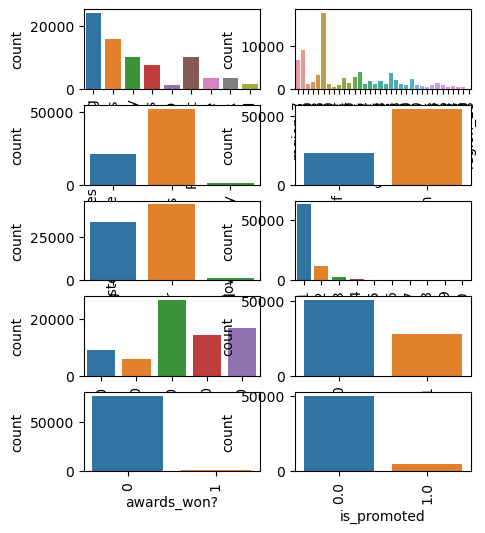

In [171]:
nr=5
nc=2
it=1

for i in cat_cols:
    plt.subplot(nr,nc,it)
    sns.countplot(x=i,data=hr)
    plt.xticks(rotation=90)
    it+=1
    
plt.tight_layout()
plt.show()

**INFERENCE of Univariate Analysis Categorical Columns**


* Sales&Marketing, Operations departments have the maximum no. of employees.
* R&D and Legal departments have the least no. of employees.

* region_2 has the maximum number of employees. 
* Maximum of the regions have very less no. of employees.

* Maximum employees have Bachelors Degree.
* The least number of employees have below secondary education.

* Male employees are higher in number then females.

* Maximum employees are recruited through the other channel
* Employees from referred recruitment channel are very low in number

* The Maximum employees have only 1 skill(no_of_training)

* Maximum employees had 3.0 Ratings previous year.

* Most of the employees do not meet the KPI>80 category.

* There are very less people who won the awards.

* There are very few promotions.

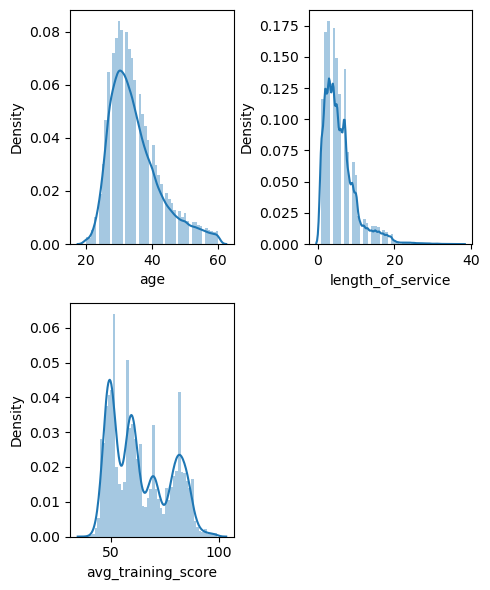

In [172]:
nrows=2
ncols=2
itr=1

for i in num_cols:
    plt.subplot(nrows,ncols,itr)
    sns.distplot(hr[i])
    itr+=1
plt.tight_layout()
plt.show()

## INFERENCES of Univariate Analysis Numerical Columns

* The no_of_trainings graph is rightly skewed i.e., 
    there are very low no of employees having high number of skills.
* Maximum employees are of age 28 to 38.
* Maximum employees have experience in that company less than 7 years.
* The avg_training_score is a multimodal data. The employees have scored from 40 to 100 marks.

# Bivariate Analysis

## Cat vs Cat 

In [173]:
cat_cols=['department','region','education','gender','recruitment_channel',
          'no_of_trainings','previous_year_rating','KPIs_met >80%',
          'awards_won?']

<Figure size 400x500 with 0 Axes>

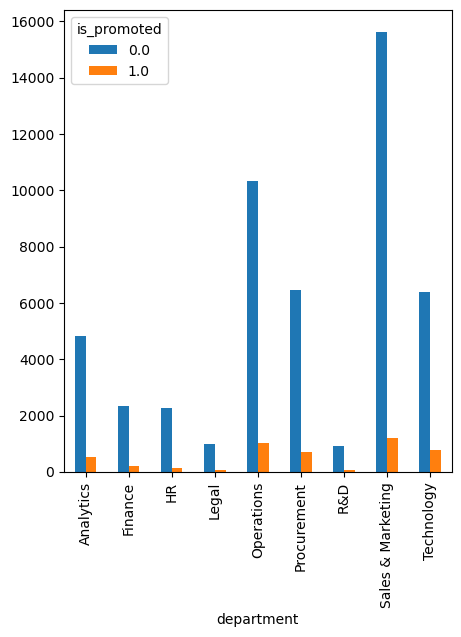

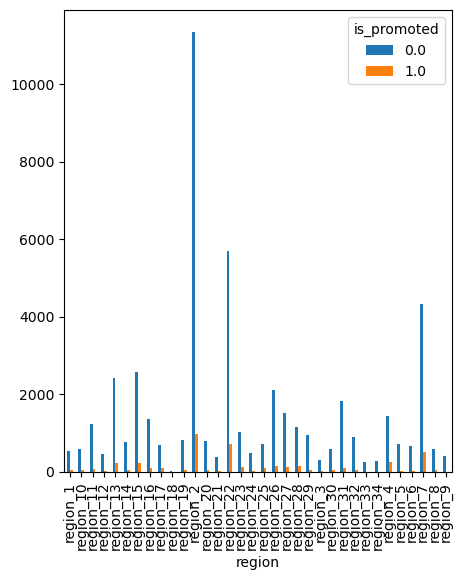

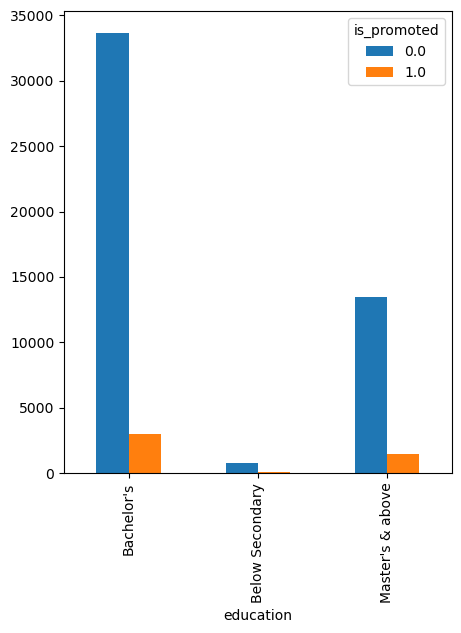

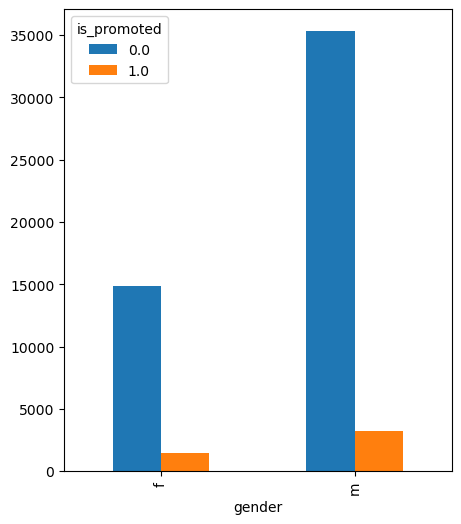

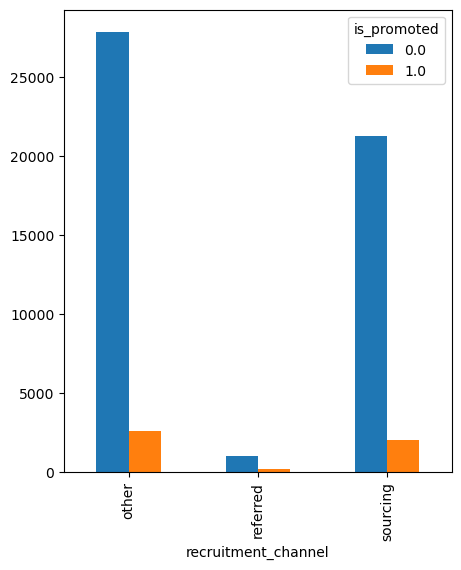

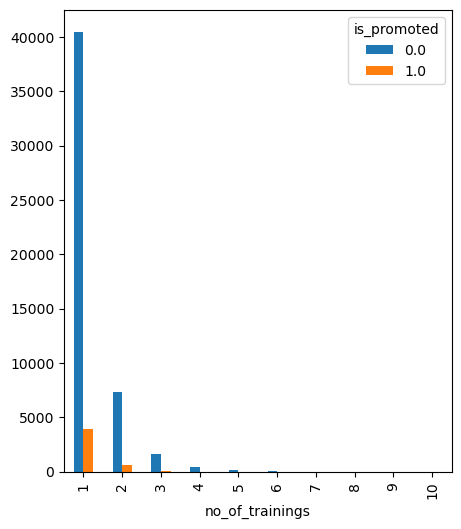

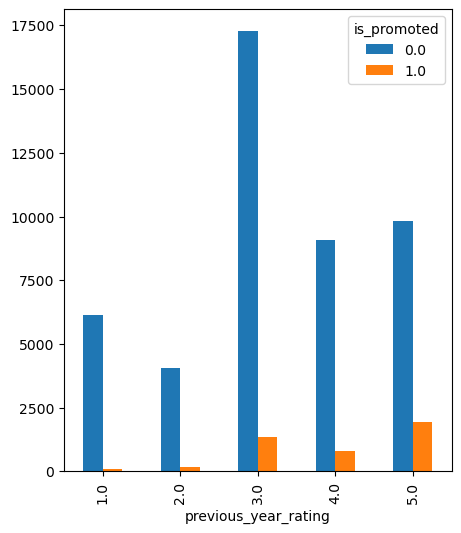

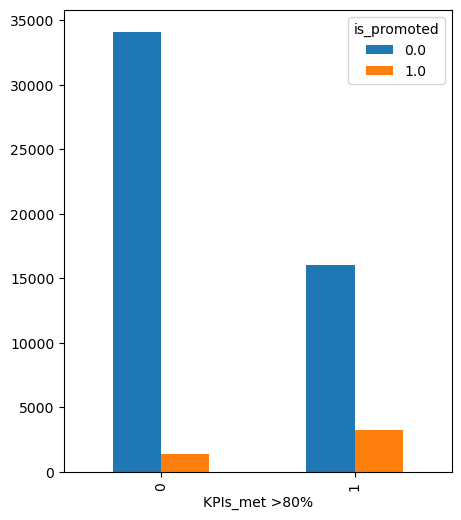

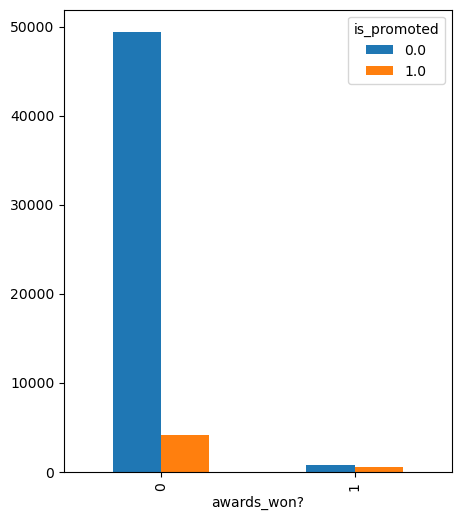

In [174]:
plt.figure(figsize=(4,5))
for i in cat_cols:
    pd.crosstab(hr[i],hr['is_promoted']).plot(kind='bar')
plt.show()

## Infereces for Bivariate Analysis Cat vs Cat(Tgt)

* Employees from Operations,Sales&Marketing,Procurement,Technology departments have high number of promotions.
* Legal and R&D have the least promotions.

* Employees working in region_2,region_22,region_7 have high no. of promotions.

* Employees from Bachelor's degree and Master's & above education have higher chances of promotions.
* Employees with education below Secondary have almost negligible chances of promotions.

* Male Employees have higher chances of promotions.

* Employees from other,sourcing recruitment_channel have higher chances of promotions.
* Employees who are referred have very low chances of promotions.

* Employees with no_of_trainings 1 have very high chances of promotions.
* With increasing no_of_trainings, employees have fewer chances of promotions.

* Employees with rating 5 and 3 have highest chances of promotions.
* Employees with rating 1 and 2 have lowest chances of promotions.

* Employees with KPIs_met>80% have greater chances of promotions.

* Employees with no awards have higher chances of promotions.

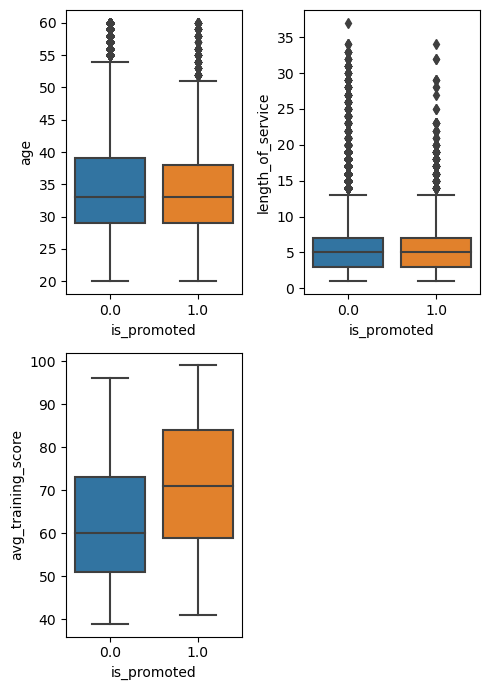

In [175]:
plt.figure(figsize=(5,7))
t=1
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(hr['is_promoted'],hr[i])
    t+=1
plt.tight_layout()

## Inferences for Bivariate Analysis Num vs Cat(tgt)

* Employees from all ages have chances of promotion. Age has many outliers.

* Length of service does not much affect the promotions.

* Employees with higher avg_training_score have higher chances of promotions.

## Missing Values

In [176]:
hr['education']=hr.groupby('department')['education'].apply(lambda x: x.fillna(x.mode()[0]))

In [177]:
print(hr.groupby(['department','gender','recruitment_channel','no_of_trainings','education'])['education'].count())

department  gender  recruitment_channel  no_of_trainings  education       
Analytics   f       other                1                Bachelor's          295
                                                          Master's & above     37
                                         2                Bachelor's           76
                                                          Master's & above      5
                                         3                Bachelor's           14
                                                                             ... 
Technology  m       sourcing             4                Below Secondary       3
                                                          Master's & above      5
                                         5                Bachelor's            5
                                         6                Bachelor's            1
                                                          Master's & above      1
Name: education, Length

In [178]:
# Education might effect people in being appointed to any department.

In [179]:
hr['previous_year_rating'].replace(to_replace=np.NaN,value=
                                   hr['previous_year_rating'].mode()[0],inplace=True)

In [180]:
# We can use the mode for categorical column.

In [181]:
hr.isnull().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

# Feature Engineering

In [182]:
hr['magic1']=hr.groupby('department')['employee_id'].transform('nunique')

In [208]:
#hr['department']=pd.factorize(hr.department)[0]
#hr['region']=pd.factorize(hr.region)[0]
hr['recruitment_channel']=pd.factorize(hr.recruitment_channel)[0]

In [184]:
hr['Gratuity']=np.where(hr.length_of_service>5,1,0)
hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,magic1,Gratuity
0,65438,0,0,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,24155,1
1,65141,1,1,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,16112,0
2,7513,0,2,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,24155,1
3,2542,0,3,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,24155,1
4,48945,2,4,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,10149,0


In [185]:
hr['age']=stats.boxcox(hr.age)[0]
hr['length_of_service']=stats.boxcox(hr.length_of_service)[0]
hr['avg_training_score']=stats.boxcox(hr.avg_training_score)[0]

# Statistics

In [186]:
#Ho:: Department does not effect the promotions.
#Ha:: Department effects the promotions.

l=hr[hr.is_promoted==0.0]['department']
s=hr[hr.is_promoted==1.0]['department']

print(stats.shapiro(l))
print(stats.shapiro(s))

#Ho:: Length of service does not effect the promotions.
#Ha:: Length of Service effects the promotions.


stats.mannwhitneyu(l,s)

# The pvalue<alpha. We reject the null hypothesis. Department effects the promotion.

ShapiroResult(statistic=0.8478711843490601, pvalue=0.0)
ShapiroResult(statistic=0.8700177669525146, pvalue=0.0)


MannwhitneyuResult(statistic=113543906.0, pvalue=0.0005728280163096218)

In [187]:
#Ho:: Education does not effect the promotions.
#Ha:: Education effects the promotions.

_,p,_,_=stats.chi2_contingency(pd.crosstab(hr.education,hr.is_promoted))
print(p)
#Education effects the promotions

5.3808089671607115e-11


In [188]:
#Ho:: Gender does not effect the promotions.
#Ha:: Gender effects the promotions.


_,p,_,_=stats.chi2_contingency(pd.crosstab(hr.gender,hr.is_promoted))
print(p)
#Gender effects the promotions.

0.009765091521176657


In [189]:
#Ho:: Recruitment_channel does not effect the promotions.
#Ha:: Recruitment_channel effects the promotions.


_,p,_,_=stats.chi2_contingency(pd.crosstab(hr.recruitment_channel,hr.is_promoted))
print(p)
#Recruitment_channel effects the promotions

6.650937825577018e-05


In [190]:
#Ho:: no_of_trainings does not effect the promotions.
#Ha:: no_of_trainings effects the promotions.


_,p,_,_=stats.chi2_contingency(pd.crosstab(hr.no_of_trainings,hr.is_promoted))
print(p)
# no of traings effect the promotions

5.6462682173663955e-05


In [191]:
no=hr[hr.is_promoted==0.0]['age']
yes=hr[hr.is_promoted==1.0]['age']

In [192]:
print(stats.shapiro(no))
print(stats.shapiro(yes))

ShapiroResult(statistic=0.9930022358894348, pvalue=8.716076448100362e-42)
ShapiroResult(statistic=0.9937446713447571, pvalue=2.0875147313872966e-13)


In [193]:
#Ho:: Age does not effect the promotions.
#Ha:: Age effects the promotions.


stats.kruskal(no,yes)
#age effects the promotions.

KruskalResult(statistic=6.356054626209985, pvalue=0.011698138540257341)

In [194]:
#Ho:: Ratings does not effect the promotions.
#Ha:: Ratings effects the promotions.


_,p,_,_=stats.chi2_contingency(pd.crosstab(hr.previous_year_rating,hr.is_promoted))
print(p)
#Ratings effect the promotions

0.0


In [195]:
l=hr[hr.is_promoted==0.0]['length_of_service']
s=hr[hr.is_promoted==1.0]['length_of_service']

In [196]:
print(stats.shapiro(l))
print(stats.shapiro(s))

ShapiroResult(statistic=0.9769443869590759, pvalue=0.0)
ShapiroResult(statistic=0.9761551022529602, pvalue=2.858613327472259e-27)


In [197]:
#Ho:: Length of service does not effect the promotions.
#Ha:: Length of Service effects the promotions.


stats.mannwhitneyu(l,s)

#length of service does not effects the promotions

MannwhitneyuResult(statistic=118240554.5, pvalue=0.238132109492055)

In [198]:
#Ho:: KPIs_met does not effect the promotions.
#Ha:: KPIs_met effects the promotions.


_,p,_,_=stats.chi2_contingency(pd.crosstab(hr['KPIs_met >80%'],hr['is_promoted']))
print(p)
#KPIS_met effect the promotions

0.0


In [199]:
#Ho:: Awards does not effect the promotions.
#Ha:: Awards effects the promotions.


_,p,_,_=stats.chi2_contingency(pd.crosstab(hr['awards_won?'],hr['is_promoted']))
print(p)
#Awards effect the promotions

0.0


In [200]:
h=hr[hr.is_promoted==0.0]['avg_training_score']
b=hr[hr.is_promoted==1.0]['avg_training_score']

In [201]:
print(stats.shapiro(h))
print(stats.shapiro(b))

ShapiroResult(statistic=0.9459085464477539, pvalue=0.0)
ShapiroResult(statistic=0.941933274269104, pvalue=2.043147811625692e-39)


In [202]:
#Ho:: Training does not effect the promotions.
#Ha:: Training effects the promotions.


stats.kruskal(h,b)
#Traing scores effect the promotions

KruskalResult(statistic=1479.4918948567117, pvalue=0.0)

In [204]:
#Ho:: Gratuity does not effect the promotions.
#Ha:: Gratuity effects the promotions.


_,p,_,_=stats.chi2_contingency(pd.crosstab(hr.Gratuity,hr.is_promoted))
print(p)
# Gratuity does not effect the promotions

0.5572059138966277


# Test-Train Split

In [205]:
hr.drop(['employee_id','Gratuity'],axis=1,inplace=True)

In [206]:
train.shape,test.shape

((54808, 14), (23490, 13))

In [210]:
newtrain = hr.loc[0:train.shape[0]-1, :]

newtest = hr.loc[train.shape[0]:, :]

In [211]:
edu_dict={"Master's & above":3,"Bachelor's":2,"Below Secondary":1}
newtrain['education']=newtrain.education.map(edu_dict)
newtest['education']=newtest.education.map(edu_dict)

In [213]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
newtrain['magic1']=sc.fit_transform(pd.DataFrame(newtrain['magic1']))
newtest['magic1']=sc.transform(pd.DataFrame(newtest['magic1']))

In [214]:
newtest.drop("is_promoted", axis = 1, inplace = True)

In [215]:
newtrain.shape,newtest.shape

((54808, 14), (23490, 13))

# Scaling & Encoding

In [216]:
dummytrain = pd.get_dummies(newtrain, drop_first = True)
dummytest = pd.get_dummies(newtest, drop_first = True)

In [230]:
dummytrain.shape,dummytest.shape

((54808, 14), (23490, 13))

# Random Forest Model

In [218]:
from sklearn.ensemble import RandomForestClassifier

X = dummytrain.drop("is_promoted", axis = 1)
y = dummytrain['is_promoted']

rf = RandomForestClassifier(criterion = "entropy")
pred = rf.fit(X, y).predict(dummytest)

In [219]:
# Submission File

soln = pd.DataFrame({"employee_id":test.employee_id, 
                     "is_promoted":pred})

In [220]:
soln.is_promoted=soln.is_promoted.astype(dtype=int)

In [221]:
soln.is_promoted

0        0
1        0
2        0
3        0
4        0
        ..
23485    0
23486    0
23487    0
23488    0
23489    1
Name: is_promoted, Length: 23490, dtype: int32

In [222]:
# Export it outside
soln.to_csv("Base-RfModel_hr.csv", index = False)     #0.4558
  

In [134]:
#cd

# Other Models

In [231]:
#Apply SMOTE
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [232]:
#Resample the Data using SMOTE
smotex,smotey=smote.fit_resample(X,y)

In [234]:
smotex.shape,smotey.shape,dummytest.shape

((100280, 13), (100280,), (23490, 13))

In [137]:
rf=RandomForestClassifier(criterion='entropy')

pred_smote=rf.fit(smotex,smotey).predict(dummytest)

In [138]:
submission=pd.read_csv('sample_submission.csv')

In [139]:
submission["is_promoted"]=pred_smote.astype(dtype=int)
submission.to_csv('smote_rf_model_hr.csv',index=False)                     #0.390

In [223]:
#Import the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [224]:
#Define the base models

def base_models():
    models=dict()
    models['lg']=LogisticRegression()
    models['dt']=DecisionTreeClassifier()
    models['rf']=RandomForestClassifier(criterion='entropy')
    models['gbm']=GradientBoostingClassifier()
    models['xgb']=XGBClassifier()
    models['lgbm']=LGBMClassifier()
    models['catboost']=CatBoostClassifier()
    models['naivebayes']=GaussianNB()
    return models


In [225]:
#Evaluation Function.....
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score,StratifiedKFold

def eval_score(model):
    cv1=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    score=cross_val_score(model,smotex,smotey,
                         scoring='f1',cv=cv1,
                         error_score='raise', n_jobs=-1)
    return score

In [226]:
#Build the models....
models=base_models()


result, names =list(), list()
for name, model in models.items():
    finalscore=eval_score(model)
    result.append(finalscore)
    names.append(name)
    print('%s %.3f (%.3f)'%(name,np.mean(result),np.std(result)))

lg 0.500 (0.094)
dt 0.715 (0.226)
rf 0.794 (0.215)
gbm 0.829 (0.196)
xgb 0.856 (0.184)
lgbm 0.874 (0.172)
catboost 0.887 (0.163)
naivebayes 0.869 (0.160)


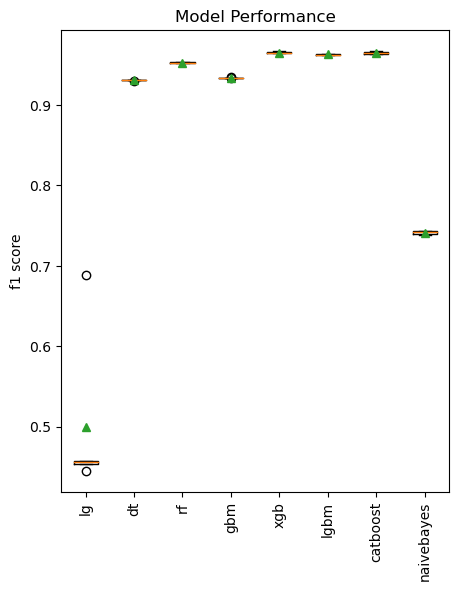

In [227]:
plt.boxplot(result,labels=names,showmeans=True)
plt.xticks(rotation=90)
plt.ylabel('f1 score')
plt.title('Model Performance')
plt.show()

In [229]:
smotex.shape,smotey.shape,dummytest.shape

((100280, 15), (100280,), (23490, 13))

In [235]:
#Lets start with xgboost

xgb=XGBClassifier()

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

pred_xgb=[]
for train_index, test_index in kfold.split(smotex,smotey):
    xtrain=smotex.iloc[train_index]
    ytrain=smotey.iloc[train_index]
    pred_xgb.append(xgb.fit(xtrain,ytrain).predict(dummytest))

In [236]:
#Generate the prdicted Values...
submission["is_promoted"]=pd.DataFrame(np.array(pred_xgb)[0].astype(dtype=int))     #0.4788

In [237]:
submission.to_csv('XGBModel_hr.csv',index=False)

In [ ]:
#Lets start with lgbmclassifier

lgbm=LGBMClassifier()

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

pred_lgbm=[]
for train_index, test_index in kfold.split(smotex,smotey):
    xtrain=smotex.iloc[train_index]
    ytrain=smotey.iloc[train_index]
    pred_lgbm.append(lgbm.fit(xtrain,ytrain).predict(dummytest))

In [ ]:
#Generate the prdicted Values...
submission["is_promoted"]=pd.DataFrame(np.array(pred_lgbm)[0].astype(dtype=int))

In [ ]:
submission.to_csv('LGBMModel_hr.csv',index=False)     #0.4741

In [238]:
#Lets start with catboost

cboost=CatBoostClassifier()

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

pred_cboost=[]
for train_index, test_index in kfold.split(smotex,smotey):
    xtrain=smotex.iloc[train_index]
    ytrain=smotey.iloc[train_index]
    pred_cboost.append(cboost.fit(xtrain,ytrain).predict(dummytest))

Learning rate set to 0.067
0:	learn: 0.6561478	total: 55.2ms	remaining: 55.2s
1:	learn: 0.6242932	total: 95.4ms	remaining: 47.6s
2:	learn: 0.5991591	total: 136ms	remaining: 45.2s
3:	learn: 0.5781665	total: 194ms	remaining: 48.3s
4:	learn: 0.5579173	total: 258ms	remaining: 51.4s
5:	learn: 0.5432021	total: 330ms	remaining: 54.7s
6:	learn: 0.5286532	total: 402ms	remaining: 57s
7:	learn: 0.5157010	total: 466ms	remaining: 57.8s
8:	learn: 0.5060893	total: 518ms	remaining: 57s
9:	learn: 0.4962444	total: 570ms	remaining: 56.4s
10:	learn: 0.4820275	total: 617ms	remaining: 55.5s
11:	learn: 0.4730909	total: 658ms	remaining: 54.2s
12:	learn: 0.4672050	total: 714ms	remaining: 54.2s
13:	learn: 0.4582110	total: 771ms	remaining: 54.3s
14:	learn: 0.4535940	total: 810ms	remaining: 53.2s
15:	learn: 0.4485935	total: 851ms	remaining: 52.3s
16:	learn: 0.4458774	total: 905ms	remaining: 52.3s
17:	learn: 0.4421965	total: 968ms	remaining: 52.8s
18:	learn: 0.4372821	total: 1.02s	remaining: 52.7s
19:	learn: 0.432

160:	learn: 0.1659630	total: 10.5s	remaining: 54.7s
161:	learn: 0.1647765	total: 10.6s	remaining: 54.6s
162:	learn: 0.1632170	total: 10.7s	remaining: 54.7s
163:	learn: 0.1627642	total: 10.7s	remaining: 54.7s
164:	learn: 0.1625842	total: 10.8s	remaining: 54.6s
165:	learn: 0.1614496	total: 10.8s	remaining: 54.4s
166:	learn: 0.1607191	total: 10.9s	remaining: 54.2s
167:	learn: 0.1601276	total: 11s	remaining: 54.3s
168:	learn: 0.1592133	total: 11s	remaining: 54.3s
169:	learn: 0.1583086	total: 11.1s	remaining: 54.3s
170:	learn: 0.1576835	total: 11.2s	remaining: 54.3s
171:	learn: 0.1572711	total: 11.3s	remaining: 54.2s
172:	learn: 0.1569855	total: 11.3s	remaining: 54s
173:	learn: 0.1565840	total: 11.3s	remaining: 53.9s
174:	learn: 0.1564702	total: 11.4s	remaining: 53.8s
175:	learn: 0.1557284	total: 11.5s	remaining: 53.6s
176:	learn: 0.1551886	total: 11.5s	remaining: 53.5s
177:	learn: 0.1544979	total: 11.6s	remaining: 53.4s
178:	learn: 0.1534307	total: 11.6s	remaining: 53.3s
179:	learn: 0.1530

319:	learn: 0.1165217	total: 19.2s	remaining: 40.8s
320:	learn: 0.1163704	total: 19.3s	remaining: 40.8s
321:	learn: 0.1162610	total: 19.4s	remaining: 40.8s
322:	learn: 0.1161389	total: 19.4s	remaining: 40.8s
323:	learn: 0.1160251	total: 19.5s	remaining: 40.7s
324:	learn: 0.1159143	total: 19.5s	remaining: 40.6s
325:	learn: 0.1158668	total: 19.6s	remaining: 40.5s
326:	learn: 0.1155787	total: 19.6s	remaining: 40.4s
327:	learn: 0.1154196	total: 19.6s	remaining: 40.3s
328:	learn: 0.1151926	total: 19.7s	remaining: 40.2s
329:	learn: 0.1151446	total: 19.7s	remaining: 40.1s
330:	learn: 0.1150227	total: 19.8s	remaining: 40s
331:	learn: 0.1149759	total: 19.8s	remaining: 39.9s
332:	learn: 0.1148866	total: 19.9s	remaining: 39.8s
333:	learn: 0.1148141	total: 19.9s	remaining: 39.7s
334:	learn: 0.1145998	total: 20s	remaining: 39.6s
335:	learn: 0.1145035	total: 20s	remaining: 39.5s
336:	learn: 0.1144591	total: 20.1s	remaining: 39.5s
337:	learn: 0.1144064	total: 20.1s	remaining: 39.4s
338:	learn: 0.1143

478:	learn: 0.1025520	total: 26.2s	remaining: 28.5s
479:	learn: 0.1025186	total: 26.3s	remaining: 28.5s
480:	learn: 0.1024567	total: 26.3s	remaining: 28.4s
481:	learn: 0.1024315	total: 26.4s	remaining: 28.3s
482:	learn: 0.1023664	total: 26.4s	remaining: 28.3s
483:	learn: 0.1023304	total: 26.4s	remaining: 28.2s
484:	learn: 0.1023068	total: 26.5s	remaining: 28.1s
485:	learn: 0.1022916	total: 26.5s	remaining: 28.1s
486:	learn: 0.1022485	total: 26.6s	remaining: 28s
487:	learn: 0.1022143	total: 26.6s	remaining: 27.9s
488:	learn: 0.1021655	total: 26.6s	remaining: 27.8s
489:	learn: 0.1021313	total: 26.7s	remaining: 27.8s
490:	learn: 0.1019923	total: 26.7s	remaining: 27.7s
491:	learn: 0.1019600	total: 26.8s	remaining: 27.6s
492:	learn: 0.1018867	total: 26.8s	remaining: 27.6s
493:	learn: 0.1018615	total: 26.8s	remaining: 27.5s
494:	learn: 0.1017834	total: 26.9s	remaining: 27.4s
495:	learn: 0.1017532	total: 26.9s	remaining: 27.4s
496:	learn: 0.1017178	total: 27s	remaining: 27.3s
497:	learn: 0.10

637:	learn: 0.0953048	total: 33.5s	remaining: 19s
638:	learn: 0.0952867	total: 33.6s	remaining: 19s
639:	learn: 0.0952411	total: 33.6s	remaining: 18.9s
640:	learn: 0.0952124	total: 33.7s	remaining: 18.9s
641:	learn: 0.0951846	total: 33.7s	remaining: 18.8s
642:	learn: 0.0951495	total: 33.8s	remaining: 18.7s
643:	learn: 0.0950995	total: 33.8s	remaining: 18.7s
644:	learn: 0.0950574	total: 33.9s	remaining: 18.6s
645:	learn: 0.0950464	total: 33.9s	remaining: 18.6s
646:	learn: 0.0950097	total: 34s	remaining: 18.5s
647:	learn: 0.0949829	total: 34s	remaining: 18.5s
648:	learn: 0.0949279	total: 34s	remaining: 18.4s
649:	learn: 0.0948887	total: 34.1s	remaining: 18.4s
650:	learn: 0.0948409	total: 34.1s	remaining: 18.3s
651:	learn: 0.0948032	total: 34.2s	remaining: 18.2s
652:	learn: 0.0947913	total: 34.2s	remaining: 18.2s
653:	learn: 0.0947035	total: 34.2s	remaining: 18.1s
654:	learn: 0.0946156	total: 34.3s	remaining: 18.1s
655:	learn: 0.0945700	total: 34.3s	remaining: 18s
656:	learn: 0.0945380	to

799:	learn: 0.0898076	total: 41.1s	remaining: 10.3s
800:	learn: 0.0897816	total: 41.2s	remaining: 10.2s
801:	learn: 0.0897102	total: 41.2s	remaining: 10.2s
802:	learn: 0.0896799	total: 41.3s	remaining: 10.1s
803:	learn: 0.0896504	total: 41.3s	remaining: 10.1s
804:	learn: 0.0896050	total: 41.3s	remaining: 10s
805:	learn: 0.0895745	total: 41.4s	remaining: 9.96s
806:	learn: 0.0895048	total: 41.4s	remaining: 9.9s
807:	learn: 0.0894843	total: 41.5s	remaining: 9.85s
808:	learn: 0.0893999	total: 41.5s	remaining: 9.79s
809:	learn: 0.0893826	total: 41.5s	remaining: 9.74s
810:	learn: 0.0893561	total: 41.6s	remaining: 9.69s
811:	learn: 0.0893189	total: 41.6s	remaining: 9.63s
812:	learn: 0.0892863	total: 41.7s	remaining: 9.58s
813:	learn: 0.0892574	total: 41.7s	remaining: 9.53s
814:	learn: 0.0892347	total: 41.8s	remaining: 9.48s
815:	learn: 0.0891939	total: 41.8s	remaining: 9.43s
816:	learn: 0.0891648	total: 41.9s	remaining: 9.38s
817:	learn: 0.0891420	total: 41.9s	remaining: 9.33s
818:	learn: 0.0

958:	learn: 0.0853748	total: 48.7s	remaining: 2.08s
959:	learn: 0.0853529	total: 48.7s	remaining: 2.03s
960:	learn: 0.0853391	total: 48.8s	remaining: 1.98s
961:	learn: 0.0853303	total: 48.8s	remaining: 1.93s
962:	learn: 0.0853126	total: 48.9s	remaining: 1.88s
963:	learn: 0.0853093	total: 48.9s	remaining: 1.83s
964:	learn: 0.0852926	total: 49s	remaining: 1.78s
965:	learn: 0.0852611	total: 49s	remaining: 1.73s
966:	learn: 0.0852404	total: 49.1s	remaining: 1.68s
967:	learn: 0.0852294	total: 49.1s	remaining: 1.62s
968:	learn: 0.0852035	total: 49.2s	remaining: 1.57s
969:	learn: 0.0851898	total: 49.3s	remaining: 1.52s
970:	learn: 0.0851685	total: 49.3s	remaining: 1.47s
971:	learn: 0.0851194	total: 49.4s	remaining: 1.42s
972:	learn: 0.0851011	total: 49.4s	remaining: 1.37s
973:	learn: 0.0850657	total: 49.5s	remaining: 1.32s
974:	learn: 0.0850090	total: 49.5s	remaining: 1.27s
975:	learn: 0.0849834	total: 49.6s	remaining: 1.22s
976:	learn: 0.0849410	total: 49.6s	remaining: 1.17s
977:	learn: 0.08

119:	learn: 0.1940682	total: 5.41s	remaining: 39.6s
120:	learn: 0.1923033	total: 5.45s	remaining: 39.6s
121:	learn: 0.1912815	total: 5.5s	remaining: 39.6s
122:	learn: 0.1889886	total: 5.55s	remaining: 39.6s
123:	learn: 0.1884227	total: 5.61s	remaining: 39.6s
124:	learn: 0.1873287	total: 5.65s	remaining: 39.6s
125:	learn: 0.1868152	total: 5.81s	remaining: 40.3s
126:	learn: 0.1857211	total: 5.88s	remaining: 40.4s
127:	learn: 0.1851335	total: 6.04s	remaining: 41.2s
128:	learn: 0.1841786	total: 6.26s	remaining: 42.2s
129:	learn: 0.1825856	total: 6.44s	remaining: 43.1s
130:	learn: 0.1814003	total: 6.63s	remaining: 44s
131:	learn: 0.1801741	total: 6.75s	remaining: 44.4s
132:	learn: 0.1788695	total: 6.96s	remaining: 45.4s
133:	learn: 0.1782912	total: 7.19s	remaining: 46.5s
134:	learn: 0.1768486	total: 7.39s	remaining: 47.4s
135:	learn: 0.1757862	total: 7.59s	remaining: 48.2s
136:	learn: 0.1752823	total: 7.71s	remaining: 48.6s
137:	learn: 0.1731933	total: 7.95s	remaining: 49.7s
138:	learn: 0.1

281:	learn: 0.1222868	total: 15.8s	remaining: 40.1s
282:	learn: 0.1220228	total: 15.8s	remaining: 40.1s
283:	learn: 0.1218339	total: 15.9s	remaining: 40.1s
284:	learn: 0.1216706	total: 16s	remaining: 40.1s
285:	learn: 0.1213367	total: 16s	remaining: 40s
286:	learn: 0.1212685	total: 16.1s	remaining: 40s
287:	learn: 0.1212022	total: 16.2s	remaining: 39.9s
288:	learn: 0.1210699	total: 16.3s	remaining: 40s
289:	learn: 0.1206170	total: 16.3s	remaining: 39.9s
290:	learn: 0.1202686	total: 16.4s	remaining: 39.9s
291:	learn: 0.1198869	total: 16.4s	remaining: 39.8s
292:	learn: 0.1195850	total: 16.5s	remaining: 39.8s
293:	learn: 0.1195142	total: 16.6s	remaining: 39.8s
294:	learn: 0.1193407	total: 16.7s	remaining: 39.9s
295:	learn: 0.1192765	total: 16.8s	remaining: 39.9s
296:	learn: 0.1191073	total: 16.8s	remaining: 39.9s
297:	learn: 0.1189452	total: 16.9s	remaining: 39.8s
298:	learn: 0.1188705	total: 16.9s	remaining: 39.7s
299:	learn: 0.1188053	total: 17s	remaining: 39.7s
300:	learn: 0.1187463	to

440:	learn: 0.1050008	total: 24.1s	remaining: 30.5s
441:	learn: 0.1049255	total: 24.1s	remaining: 30.4s
442:	learn: 0.1048808	total: 24.2s	remaining: 30.4s
443:	learn: 0.1048418	total: 24.2s	remaining: 30.3s
444:	learn: 0.1048068	total: 24.2s	remaining: 30.2s
445:	learn: 0.1047715	total: 24.3s	remaining: 30.2s
446:	learn: 0.1047058	total: 24.4s	remaining: 30.1s
447:	learn: 0.1046605	total: 24.4s	remaining: 30.1s
448:	learn: 0.1046322	total: 24.4s	remaining: 30s
449:	learn: 0.1045961	total: 24.5s	remaining: 29.9s
450:	learn: 0.1045675	total: 24.5s	remaining: 29.9s
451:	learn: 0.1044630	total: 24.6s	remaining: 29.8s
452:	learn: 0.1041827	total: 24.6s	remaining: 29.7s
453:	learn: 0.1040980	total: 24.6s	remaining: 29.6s
454:	learn: 0.1039938	total: 24.7s	remaining: 29.6s
455:	learn: 0.1039342	total: 24.7s	remaining: 29.5s
456:	learn: 0.1038285	total: 24.8s	remaining: 29.4s
457:	learn: 0.1037597	total: 24.8s	remaining: 29.4s
458:	learn: 0.1037258	total: 24.9s	remaining: 29.3s
459:	learn: 0.

600:	learn: 0.0966217	total: 34.2s	remaining: 22.7s
601:	learn: 0.0965871	total: 34.3s	remaining: 22.7s
602:	learn: 0.0965480	total: 34.4s	remaining: 22.7s
603:	learn: 0.0965119	total: 34.5s	remaining: 22.6s
604:	learn: 0.0964710	total: 34.6s	remaining: 22.6s
605:	learn: 0.0964134	total: 34.7s	remaining: 22.6s
606:	learn: 0.0963376	total: 34.8s	remaining: 22.6s
607:	learn: 0.0962913	total: 34.9s	remaining: 22.5s
608:	learn: 0.0962672	total: 35s	remaining: 22.5s
609:	learn: 0.0962289	total: 35.1s	remaining: 22.5s
610:	learn: 0.0961597	total: 35.5s	remaining: 22.6s
611:	learn: 0.0961263	total: 35.8s	remaining: 22.7s
612:	learn: 0.0960804	total: 36.3s	remaining: 22.9s
613:	learn: 0.0960418	total: 36.4s	remaining: 22.9s
614:	learn: 0.0960301	total: 36.9s	remaining: 23.1s
615:	learn: 0.0960111	total: 37.1s	remaining: 23.1s
616:	learn: 0.0959693	total: 37.2s	remaining: 23.1s
617:	learn: 0.0959275	total: 37.2s	remaining: 23s
618:	learn: 0.0958989	total: 37.3s	remaining: 23s
619:	learn: 0.0958

761:	learn: 0.0902377	total: 48.2s	remaining: 15s
762:	learn: 0.0902097	total: 48.3s	remaining: 15s
763:	learn: 0.0901874	total: 48.3s	remaining: 14.9s
764:	learn: 0.0901502	total: 48.4s	remaining: 14.9s
765:	learn: 0.0901401	total: 48.4s	remaining: 14.8s
766:	learn: 0.0901213	total: 48.5s	remaining: 14.7s
767:	learn: 0.0901021	total: 48.5s	remaining: 14.7s
768:	learn: 0.0900707	total: 48.6s	remaining: 14.6s
769:	learn: 0.0900551	total: 48.6s	remaining: 14.5s
770:	learn: 0.0900326	total: 48.7s	remaining: 14.5s
771:	learn: 0.0900079	total: 48.8s	remaining: 14.4s
772:	learn: 0.0899873	total: 48.8s	remaining: 14.3s
773:	learn: 0.0899537	total: 48.9s	remaining: 14.3s
774:	learn: 0.0899310	total: 48.9s	remaining: 14.2s
775:	learn: 0.0899112	total: 49s	remaining: 14.1s
776:	learn: 0.0898827	total: 49s	remaining: 14.1s
777:	learn: 0.0898623	total: 49.1s	remaining: 14s
778:	learn: 0.0898419	total: 49.2s	remaining: 13.9s
779:	learn: 0.0898057	total: 49.2s	remaining: 13.9s
780:	learn: 0.0897626	

920:	learn: 0.0860397	total: 1m 1s	remaining: 5.31s
921:	learn: 0.0860082	total: 1m 1s	remaining: 5.24s
922:	learn: 0.0859892	total: 1m 2s	remaining: 5.17s
923:	learn: 0.0859518	total: 1m 2s	remaining: 5.11s
924:	learn: 0.0859370	total: 1m 2s	remaining: 5.04s
925:	learn: 0.0859090	total: 1m 2s	remaining: 4.97s
926:	learn: 0.0858924	total: 1m 2s	remaining: 4.9s
927:	learn: 0.0858604	total: 1m 2s	remaining: 4.83s
928:	learn: 0.0858518	total: 1m 2s	remaining: 4.77s
929:	learn: 0.0858312	total: 1m 2s	remaining: 4.7s
930:	learn: 0.0858026	total: 1m 2s	remaining: 4.63s
931:	learn: 0.0857856	total: 1m 2s	remaining: 4.56s
932:	learn: 0.0857700	total: 1m 2s	remaining: 4.49s
933:	learn: 0.0857556	total: 1m 2s	remaining: 4.42s
934:	learn: 0.0857360	total: 1m 2s	remaining: 4.36s
935:	learn: 0.0857206	total: 1m 2s	remaining: 4.29s
936:	learn: 0.0856873	total: 1m 2s	remaining: 4.22s
937:	learn: 0.0856676	total: 1m 2s	remaining: 4.16s
938:	learn: 0.0856547	total: 1m 2s	remaining: 4.09s
939:	learn: 0.

79:	learn: 0.2383572	total: 11.8s	remaining: 2m 16s
80:	learn: 0.2374395	total: 11.9s	remaining: 2m 14s
81:	learn: 0.2358528	total: 11.9s	remaining: 2m 13s
82:	learn: 0.2350362	total: 12s	remaining: 2m 12s
83:	learn: 0.2339683	total: 12s	remaining: 2m 11s
84:	learn: 0.2336044	total: 12.1s	remaining: 2m 10s
85:	learn: 0.2302917	total: 12.2s	remaining: 2m 9s
86:	learn: 0.2289576	total: 12.2s	remaining: 2m 8s
87:	learn: 0.2282535	total: 12.3s	remaining: 2m 7s
88:	learn: 0.2259798	total: 12.3s	remaining: 2m 6s
89:	learn: 0.2228796	total: 12.4s	remaining: 2m 5s
90:	learn: 0.2205409	total: 12.4s	remaining: 2m 4s
91:	learn: 0.2201264	total: 12.5s	remaining: 2m 3s
92:	learn: 0.2190989	total: 12.5s	remaining: 2m 2s
93:	learn: 0.2179768	total: 12.6s	remaining: 2m 1s
94:	learn: 0.2168036	total: 12.7s	remaining: 2m
95:	learn: 0.2151782	total: 12.7s	remaining: 1m 59s
96:	learn: 0.2132787	total: 12.8s	remaining: 1m 58s
97:	learn: 0.2129638	total: 12.8s	remaining: 1m 58s
98:	learn: 0.2107273	total: 1

237:	learn: 0.1308768	total: 19.9s	remaining: 1m 3s
238:	learn: 0.1307196	total: 19.9s	remaining: 1m 3s
239:	learn: 0.1306157	total: 19.9s	remaining: 1m 3s
240:	learn: 0.1301763	total: 20s	remaining: 1m 2s
241:	learn: 0.1297937	total: 20.1s	remaining: 1m 2s
242:	learn: 0.1296991	total: 20.1s	remaining: 1m 2s
243:	learn: 0.1292358	total: 20.2s	remaining: 1m 2s
244:	learn: 0.1288392	total: 20.2s	remaining: 1m 2s
245:	learn: 0.1287637	total: 20.3s	remaining: 1m 2s
246:	learn: 0.1285950	total: 20.3s	remaining: 1m 1s
247:	learn: 0.1281159	total: 20.4s	remaining: 1m 1s
248:	learn: 0.1279784	total: 20.4s	remaining: 1m 1s
249:	learn: 0.1278305	total: 20.4s	remaining: 1m 1s
250:	learn: 0.1275588	total: 20.5s	remaining: 1m 1s
251:	learn: 0.1274283	total: 20.5s	remaining: 1m
252:	learn: 0.1273408	total: 20.6s	remaining: 1m
253:	learn: 0.1270070	total: 20.6s	remaining: 1m
254:	learn: 0.1269182	total: 20.7s	remaining: 1m
255:	learn: 0.1267587	total: 20.7s	remaining: 1m
256:	learn: 0.1266104	total: 

399:	learn: 0.1094075	total: 27.8s	remaining: 41.7s
400:	learn: 0.1093417	total: 27.8s	remaining: 41.6s
401:	learn: 0.1092744	total: 27.9s	remaining: 41.5s
402:	learn: 0.1092395	total: 28s	remaining: 41.4s
403:	learn: 0.1091551	total: 28s	remaining: 41.3s
404:	learn: 0.1091176	total: 28.1s	remaining: 41.2s
405:	learn: 0.1090839	total: 28.1s	remaining: 41.1s
406:	learn: 0.1090105	total: 28.1s	remaining: 41s
407:	learn: 0.1089851	total: 28.2s	remaining: 40.9s
408:	learn: 0.1089590	total: 28.2s	remaining: 40.8s
409:	learn: 0.1089195	total: 28.3s	remaining: 40.7s
410:	learn: 0.1088056	total: 28.3s	remaining: 40.6s
411:	learn: 0.1087471	total: 28.4s	remaining: 40.5s
412:	learn: 0.1087168	total: 28.4s	remaining: 40.4s
413:	learn: 0.1086096	total: 28.5s	remaining: 40.3s
414:	learn: 0.1085497	total: 28.5s	remaining: 40.2s
415:	learn: 0.1084916	total: 28.6s	remaining: 40.1s
416:	learn: 0.1084378	total: 28.6s	remaining: 40s
417:	learn: 0.1083915	total: 28.7s	remaining: 39.9s
418:	learn: 0.108333

560:	learn: 0.0997752	total: 36.2s	remaining: 28.3s
561:	learn: 0.0997130	total: 36.2s	remaining: 28.2s
562:	learn: 0.0996787	total: 36.3s	remaining: 28.2s
563:	learn: 0.0996392	total: 36.3s	remaining: 28.1s
564:	learn: 0.0996051	total: 36.4s	remaining: 28s
565:	learn: 0.0995716	total: 36.4s	remaining: 27.9s
566:	learn: 0.0995629	total: 36.5s	remaining: 27.9s
567:	learn: 0.0995217	total: 36.5s	remaining: 27.8s
568:	learn: 0.0994347	total: 36.6s	remaining: 27.7s
569:	learn: 0.0993758	total: 36.6s	remaining: 27.6s
570:	learn: 0.0993445	total: 36.7s	remaining: 27.6s
571:	learn: 0.0993063	total: 36.7s	remaining: 27.5s
572:	learn: 0.0992770	total: 36.8s	remaining: 27.4s
573:	learn: 0.0992040	total: 36.8s	remaining: 27.3s
574:	learn: 0.0991800	total: 36.9s	remaining: 27.3s
575:	learn: 0.0991559	total: 36.9s	remaining: 27.2s
576:	learn: 0.0990958	total: 37s	remaining: 27.1s
577:	learn: 0.0990840	total: 37s	remaining: 27s
578:	learn: 0.0990472	total: 37.1s	remaining: 27s
579:	learn: 0.0989694	

720:	learn: 0.0934733	total: 44.5s	remaining: 17.2s
721:	learn: 0.0934471	total: 44.5s	remaining: 17.1s
722:	learn: 0.0934126	total: 44.6s	remaining: 17.1s
723:	learn: 0.0933924	total: 44.6s	remaining: 17s
724:	learn: 0.0933197	total: 44.7s	remaining: 16.9s
725:	learn: 0.0932631	total: 44.7s	remaining: 16.9s
726:	learn: 0.0932333	total: 44.8s	remaining: 16.8s
727:	learn: 0.0932114	total: 44.8s	remaining: 16.8s
728:	learn: 0.0931410	total: 44.9s	remaining: 16.7s
729:	learn: 0.0931005	total: 44.9s	remaining: 16.6s
730:	learn: 0.0930806	total: 45s	remaining: 16.5s
731:	learn: 0.0930321	total: 45s	remaining: 16.5s
732:	learn: 0.0930050	total: 45.1s	remaining: 16.4s
733:	learn: 0.0929638	total: 45.1s	remaining: 16.3s
734:	learn: 0.0929354	total: 45.2s	remaining: 16.3s
735:	learn: 0.0929091	total: 45.2s	remaining: 16.2s
736:	learn: 0.0928924	total: 45.3s	remaining: 16.2s
737:	learn: 0.0928673	total: 45.3s	remaining: 16.1s
738:	learn: 0.0928258	total: 45.4s	remaining: 16s
739:	learn: 0.092810

882:	learn: 0.0885020	total: 53s	remaining: 7.02s
883:	learn: 0.0884409	total: 53s	remaining: 6.96s
884:	learn: 0.0884284	total: 53.1s	remaining: 6.9s
885:	learn: 0.0884021	total: 53.2s	remaining: 6.84s
886:	learn: 0.0883485	total: 53.2s	remaining: 6.78s
887:	learn: 0.0883263	total: 53.3s	remaining: 6.72s
888:	learn: 0.0883109	total: 53.4s	remaining: 6.66s
889:	learn: 0.0882786	total: 53.4s	remaining: 6.6s
890:	learn: 0.0882466	total: 53.5s	remaining: 6.54s
891:	learn: 0.0882153	total: 53.6s	remaining: 6.48s
892:	learn: 0.0882032	total: 53.6s	remaining: 6.42s
893:	learn: 0.0881819	total: 53.7s	remaining: 6.36s
894:	learn: 0.0881430	total: 53.7s	remaining: 6.3s
895:	learn: 0.0881107	total: 53.8s	remaining: 6.24s
896:	learn: 0.0880948	total: 53.8s	remaining: 6.18s
897:	learn: 0.0880765	total: 53.9s	remaining: 6.12s
898:	learn: 0.0880509	total: 53.9s	remaining: 6.06s
899:	learn: 0.0880301	total: 54s	remaining: 6s
900:	learn: 0.0880075	total: 54s	remaining: 5.93s
901:	learn: 0.0879733	tota

42:	learn: 0.3168847	total: 2.3s	remaining: 51.3s
43:	learn: 0.3135150	total: 2.35s	remaining: 51.1s
44:	learn: 0.3114267	total: 2.41s	remaining: 51.1s
45:	learn: 0.3079208	total: 2.47s	remaining: 51.2s
46:	learn: 0.3067900	total: 2.51s	remaining: 50.9s
47:	learn: 0.3048824	total: 2.56s	remaining: 50.8s
48:	learn: 0.3027188	total: 2.6s	remaining: 50.5s
49:	learn: 0.3007454	total: 2.65s	remaining: 50.4s
50:	learn: 0.2989025	total: 2.7s	remaining: 50.2s
51:	learn: 0.2957382	total: 2.75s	remaining: 50.1s
52:	learn: 0.2928386	total: 2.79s	remaining: 50s
53:	learn: 0.2917970	total: 2.84s	remaining: 49.8s
54:	learn: 0.2892076	total: 2.89s	remaining: 49.7s
55:	learn: 0.2880158	total: 2.93s	remaining: 49.4s
56:	learn: 0.2855643	total: 2.99s	remaining: 49.4s
57:	learn: 0.2842202	total: 3.04s	remaining: 49.3s
58:	learn: 0.2821648	total: 3.08s	remaining: 49.2s
59:	learn: 0.2807234	total: 3.13s	remaining: 49.1s
60:	learn: 0.2802025	total: 3.18s	remaining: 49s
61:	learn: 0.2754134	total: 3.23s	rema

204:	learn: 0.1418610	total: 10.7s	remaining: 41.6s
205:	learn: 0.1414630	total: 10.8s	remaining: 41.6s
206:	learn: 0.1402439	total: 10.8s	remaining: 41.5s
207:	learn: 0.1398265	total: 10.9s	remaining: 41.5s
208:	learn: 0.1391737	total: 11s	remaining: 41.5s
209:	learn: 0.1386457	total: 11s	remaining: 41.5s
210:	learn: 0.1382602	total: 11.1s	remaining: 41.4s
211:	learn: 0.1380768	total: 11.1s	remaining: 41.4s
212:	learn: 0.1378083	total: 11.2s	remaining: 41.3s
213:	learn: 0.1374088	total: 11.2s	remaining: 41.3s
214:	learn: 0.1372975	total: 11.3s	remaining: 41.2s
215:	learn: 0.1366957	total: 11.3s	remaining: 41.1s
216:	learn: 0.1364086	total: 11.4s	remaining: 41.1s
217:	learn: 0.1363227	total: 11.4s	remaining: 41s
218:	learn: 0.1359105	total: 11.5s	remaining: 40.9s
219:	learn: 0.1356152	total: 11.5s	remaining: 40.9s
220:	learn: 0.1354062	total: 11.6s	remaining: 40.8s
221:	learn: 0.1351146	total: 11.6s	remaining: 40.7s
222:	learn: 0.1349335	total: 11.7s	remaining: 40.7s
223:	learn: 0.1343

366:	learn: 0.1108996	total: 19.1s	remaining: 32.9s
367:	learn: 0.1108441	total: 19.1s	remaining: 32.9s
368:	learn: 0.1106843	total: 19.2s	remaining: 32.8s
369:	learn: 0.1106411	total: 19.2s	remaining: 32.8s
370:	learn: 0.1105000	total: 19.3s	remaining: 32.7s
371:	learn: 0.1104641	total: 19.4s	remaining: 32.7s
372:	learn: 0.1099439	total: 19.4s	remaining: 32.6s
373:	learn: 0.1098875	total: 19.5s	remaining: 32.6s
374:	learn: 0.1097642	total: 19.5s	remaining: 32.5s
375:	learn: 0.1095885	total: 19.6s	remaining: 32.5s
376:	learn: 0.1095364	total: 19.6s	remaining: 32.4s
377:	learn: 0.1094683	total: 19.7s	remaining: 32.4s
378:	learn: 0.1094217	total: 19.7s	remaining: 32.3s
379:	learn: 0.1093687	total: 19.8s	remaining: 32.3s
380:	learn: 0.1092557	total: 19.9s	remaining: 32.3s
381:	learn: 0.1092204	total: 19.9s	remaining: 32.2s
382:	learn: 0.1091501	total: 19.9s	remaining: 32.1s
383:	learn: 0.1090974	total: 20s	remaining: 32.1s
384:	learn: 0.1090446	total: 20s	remaining: 32s
385:	learn: 0.1089

529:	learn: 0.1002825	total: 27.5s	remaining: 24.4s
530:	learn: 0.1002466	total: 27.6s	remaining: 24.4s
531:	learn: 0.1001937	total: 27.6s	remaining: 24.3s
532:	learn: 0.1001496	total: 27.7s	remaining: 24.3s
533:	learn: 0.1001059	total: 27.7s	remaining: 24.2s
534:	learn: 0.1000051	total: 27.8s	remaining: 24.2s
535:	learn: 0.0999793	total: 27.9s	remaining: 24.1s
536:	learn: 0.0999447	total: 27.9s	remaining: 24.1s
537:	learn: 0.0999098	total: 28.1s	remaining: 24.1s
538:	learn: 0.0998645	total: 28.2s	remaining: 24.1s
539:	learn: 0.0998483	total: 28.3s	remaining: 24.1s
540:	learn: 0.0998179	total: 28.4s	remaining: 24.1s
541:	learn: 0.0997702	total: 28.4s	remaining: 24s
542:	learn: 0.0997178	total: 28.5s	remaining: 24s
543:	learn: 0.0996905	total: 28.6s	remaining: 23.9s
544:	learn: 0.0996209	total: 28.6s	remaining: 23.9s
545:	learn: 0.0995965	total: 28.7s	remaining: 23.8s
546:	learn: 0.0995779	total: 28.7s	remaining: 23.8s
547:	learn: 0.0995164	total: 28.8s	remaining: 23.8s
548:	learn: 0.09

689:	learn: 0.0939804	total: 36.7s	remaining: 16.5s
690:	learn: 0.0939654	total: 36.7s	remaining: 16.4s
691:	learn: 0.0939475	total: 36.8s	remaining: 16.4s
692:	learn: 0.0939042	total: 36.8s	remaining: 16.3s
693:	learn: 0.0938770	total: 36.9s	remaining: 16.3s
694:	learn: 0.0938464	total: 36.9s	remaining: 16.2s
695:	learn: 0.0938239	total: 37s	remaining: 16.2s
696:	learn: 0.0937889	total: 37s	remaining: 16.1s
697:	learn: 0.0937559	total: 37.1s	remaining: 16.1s
698:	learn: 0.0937238	total: 37.2s	remaining: 16s
699:	learn: 0.0937128	total: 37.2s	remaining: 15.9s
700:	learn: 0.0936539	total: 37.3s	remaining: 15.9s
701:	learn: 0.0935842	total: 37.3s	remaining: 15.8s
702:	learn: 0.0935558	total: 37.4s	remaining: 15.8s
703:	learn: 0.0935454	total: 37.4s	remaining: 15.7s
704:	learn: 0.0934831	total: 37.5s	remaining: 15.7s
705:	learn: 0.0934696	total: 37.5s	remaining: 15.6s
706:	learn: 0.0934445	total: 37.6s	remaining: 15.6s
707:	learn: 0.0934171	total: 37.6s	remaining: 15.5s
708:	learn: 0.0934

848:	learn: 0.0887766	total: 45.3s	remaining: 8.05s
849:	learn: 0.0886988	total: 45.3s	remaining: 8s
850:	learn: 0.0886825	total: 45.4s	remaining: 7.95s
851:	learn: 0.0886584	total: 45.4s	remaining: 7.89s
852:	learn: 0.0886317	total: 45.5s	remaining: 7.84s
853:	learn: 0.0886014	total: 45.6s	remaining: 7.79s
854:	learn: 0.0885841	total: 45.6s	remaining: 7.74s
855:	learn: 0.0885618	total: 45.7s	remaining: 7.68s
856:	learn: 0.0885237	total: 45.7s	remaining: 7.63s
857:	learn: 0.0885040	total: 45.8s	remaining: 7.58s
858:	learn: 0.0884767	total: 45.8s	remaining: 7.53s
859:	learn: 0.0884533	total: 45.9s	remaining: 7.47s
860:	learn: 0.0884244	total: 45.9s	remaining: 7.42s
861:	learn: 0.0883877	total: 46s	remaining: 7.36s
862:	learn: 0.0883567	total: 46.1s	remaining: 7.31s
863:	learn: 0.0883195	total: 46.1s	remaining: 7.26s
864:	learn: 0.0882927	total: 46.2s	remaining: 7.2s
865:	learn: 0.0882752	total: 46.2s	remaining: 7.15s
866:	learn: 0.0882541	total: 46.3s	remaining: 7.1s
867:	learn: 0.08824

7:	learn: 0.5178533	total: 437ms	remaining: 54.2s
8:	learn: 0.5070597	total: 488ms	remaining: 53.7s
9:	learn: 0.4934302	total: 539ms	remaining: 53.4s
10:	learn: 0.4832766	total: 592ms	remaining: 53.2s
11:	learn: 0.4762186	total: 644ms	remaining: 53s
12:	learn: 0.4702825	total: 697ms	remaining: 53s
13:	learn: 0.4621985	total: 759ms	remaining: 53.5s
14:	learn: 0.4584068	total: 812ms	remaining: 53.3s
15:	learn: 0.4510477	total: 863ms	remaining: 53.1s
16:	learn: 0.4449605	total: 916ms	remaining: 53s
17:	learn: 0.4407639	total: 979ms	remaining: 53.4s
18:	learn: 0.4342640	total: 1.03s	remaining: 53.2s
19:	learn: 0.4304565	total: 1.08s	remaining: 53.1s
20:	learn: 0.4283101	total: 1.13s	remaining: 52.8s
21:	learn: 0.4233288	total: 1.19s	remaining: 52.8s
22:	learn: 0.4205842	total: 1.23s	remaining: 52.4s
23:	learn: 0.4169313	total: 1.29s	remaining: 52.5s
24:	learn: 0.4134147	total: 1.34s	remaining: 52.2s
25:	learn: 0.4045780	total: 1.39s	remaining: 52.2s
26:	learn: 0.4012994	total: 1.44s	remain

171:	learn: 0.1543721	total: 8.9s	remaining: 42.9s
172:	learn: 0.1542490	total: 8.95s	remaining: 42.8s
173:	learn: 0.1536572	total: 9s	remaining: 42.7s
174:	learn: 0.1532983	total: 9.05s	remaining: 42.7s
175:	learn: 0.1523557	total: 9.1s	remaining: 42.6s
176:	learn: 0.1516017	total: 9.15s	remaining: 42.6s
177:	learn: 0.1514579	total: 9.21s	remaining: 42.5s
178:	learn: 0.1509687	total: 9.26s	remaining: 42.5s
179:	learn: 0.1508454	total: 9.31s	remaining: 42.4s
180:	learn: 0.1500786	total: 9.37s	remaining: 42.4s
181:	learn: 0.1496619	total: 9.42s	remaining: 42.3s
182:	learn: 0.1493022	total: 9.47s	remaining: 42.3s
183:	learn: 0.1483930	total: 9.53s	remaining: 42.3s
184:	learn: 0.1481519	total: 9.58s	remaining: 42.2s
185:	learn: 0.1474096	total: 9.63s	remaining: 42.2s
186:	learn: 0.1468592	total: 9.68s	remaining: 42.1s
187:	learn: 0.1465188	total: 9.73s	remaining: 42s
188:	learn: 0.1461529	total: 9.78s	remaining: 42s
189:	learn: 0.1456524	total: 9.84s	remaining: 42s
190:	learn: 0.1451335	t

333:	learn: 0.1141432	total: 17.2s	remaining: 34.4s
334:	learn: 0.1140844	total: 17.3s	remaining: 34.3s
335:	learn: 0.1140185	total: 17.3s	remaining: 34.3s
336:	learn: 0.1138541	total: 17.4s	remaining: 34.2s
337:	learn: 0.1135530	total: 17.4s	remaining: 34.2s
338:	learn: 0.1134791	total: 17.5s	remaining: 34.1s
339:	learn: 0.1134418	total: 17.5s	remaining: 34.1s
340:	learn: 0.1129836	total: 17.6s	remaining: 34s
341:	learn: 0.1128935	total: 17.7s	remaining: 34s
342:	learn: 0.1128312	total: 17.7s	remaining: 33.9s
343:	learn: 0.1127843	total: 17.8s	remaining: 33.9s
344:	learn: 0.1127034	total: 17.8s	remaining: 33.8s
345:	learn: 0.1126743	total: 17.9s	remaining: 33.8s
346:	learn: 0.1126412	total: 17.9s	remaining: 33.7s
347:	learn: 0.1126030	total: 18s	remaining: 33.7s
348:	learn: 0.1125323	total: 18s	remaining: 33.6s
349:	learn: 0.1124672	total: 18.1s	remaining: 33.6s
350:	learn: 0.1123629	total: 18.1s	remaining: 33.5s
351:	learn: 0.1123153	total: 18.2s	remaining: 33.5s
352:	learn: 0.112282

494:	learn: 0.1020530	total: 25.7s	remaining: 26.2s
495:	learn: 0.1020073	total: 25.8s	remaining: 26.2s
496:	learn: 0.1019743	total: 25.8s	remaining: 26.1s
497:	learn: 0.1019438	total: 25.8s	remaining: 26.1s
498:	learn: 0.1019062	total: 25.9s	remaining: 26s
499:	learn: 0.1018620	total: 25.9s	remaining: 25.9s
500:	learn: 0.1018270	total: 26s	remaining: 25.9s
501:	learn: 0.1017839	total: 26s	remaining: 25.8s
502:	learn: 0.1017416	total: 26.1s	remaining: 25.8s
503:	learn: 0.1016994	total: 26.1s	remaining: 25.7s
504:	learn: 0.1016442	total: 26.2s	remaining: 25.7s
505:	learn: 0.1016040	total: 26.2s	remaining: 25.6s
506:	learn: 0.1015055	total: 26.3s	remaining: 25.6s
507:	learn: 0.1014633	total: 26.3s	remaining: 25.5s
508:	learn: 0.1014278	total: 26.4s	remaining: 25.5s
509:	learn: 0.1013955	total: 26.5s	remaining: 25.4s
510:	learn: 0.1012864	total: 26.5s	remaining: 25.4s
511:	learn: 0.1011244	total: 26.6s	remaining: 25.3s
512:	learn: 0.1009949	total: 26.6s	remaining: 25.3s
513:	learn: 0.1008

656:	learn: 0.0947287	total: 35.1s	remaining: 18.3s
657:	learn: 0.0947131	total: 35.1s	remaining: 18.3s
658:	learn: 0.0946824	total: 35.2s	remaining: 18.2s
659:	learn: 0.0946716	total: 35.3s	remaining: 18.2s
660:	learn: 0.0946650	total: 35.3s	remaining: 18.1s
661:	learn: 0.0946102	total: 35.4s	remaining: 18.1s
662:	learn: 0.0945784	total: 35.4s	remaining: 18s
663:	learn: 0.0945485	total: 35.5s	remaining: 18s
664:	learn: 0.0944980	total: 35.6s	remaining: 17.9s
665:	learn: 0.0944734	total: 35.7s	remaining: 17.9s
666:	learn: 0.0944344	total: 35.7s	remaining: 17.8s
667:	learn: 0.0944088	total: 35.8s	remaining: 17.8s
668:	learn: 0.0943890	total: 35.9s	remaining: 17.8s
669:	learn: 0.0943540	total: 35.9s	remaining: 17.7s
670:	learn: 0.0943218	total: 36s	remaining: 17.7s
671:	learn: 0.0942768	total: 36.1s	remaining: 17.6s
672:	learn: 0.0942385	total: 36.2s	remaining: 17.6s
673:	learn: 0.0942187	total: 36.2s	remaining: 17.5s
674:	learn: 0.0941947	total: 36.3s	remaining: 17.5s
675:	learn: 0.0941

816:	learn: 0.0897570	total: 44.1s	remaining: 9.88s
817:	learn: 0.0897298	total: 44.2s	remaining: 9.83s
818:	learn: 0.0897153	total: 44.2s	remaining: 9.78s
819:	learn: 0.0896960	total: 44.3s	remaining: 9.72s
820:	learn: 0.0896719	total: 44.3s	remaining: 9.66s
821:	learn: 0.0896581	total: 44.4s	remaining: 9.61s
822:	learn: 0.0896350	total: 44.4s	remaining: 9.55s
823:	learn: 0.0896098	total: 44.5s	remaining: 9.5s
824:	learn: 0.0895871	total: 44.5s	remaining: 9.45s
825:	learn: 0.0895646	total: 44.6s	remaining: 9.39s
826:	learn: 0.0895610	total: 44.6s	remaining: 9.34s
827:	learn: 0.0894806	total: 44.7s	remaining: 9.28s
828:	learn: 0.0894639	total: 44.7s	remaining: 9.22s
829:	learn: 0.0893896	total: 44.8s	remaining: 9.17s
830:	learn: 0.0893672	total: 44.8s	remaining: 9.12s
831:	learn: 0.0893457	total: 44.9s	remaining: 9.06s
832:	learn: 0.0893163	total: 44.9s	remaining: 9.01s
833:	learn: 0.0892817	total: 45s	remaining: 8.95s
834:	learn: 0.0892604	total: 45s	remaining: 8.9s
835:	learn: 0.0892

975:	learn: 0.0852259	total: 52.5s	remaining: 1.29s
976:	learn: 0.0851611	total: 52.6s	remaining: 1.24s
977:	learn: 0.0851269	total: 52.6s	remaining: 1.18s
978:	learn: 0.0850701	total: 52.7s	remaining: 1.13s
979:	learn: 0.0850509	total: 52.7s	remaining: 1.07s
980:	learn: 0.0850300	total: 52.8s	remaining: 1.02s
981:	learn: 0.0850134	total: 52.8s	remaining: 968ms
982:	learn: 0.0849838	total: 52.9s	remaining: 914ms
983:	learn: 0.0849450	total: 52.9s	remaining: 860ms
984:	learn: 0.0849099	total: 53s	remaining: 806ms
985:	learn: 0.0848930	total: 53s	remaining: 753ms
986:	learn: 0.0848787	total: 53s	remaining: 699ms
987:	learn: 0.0848510	total: 53.1s	remaining: 645ms
988:	learn: 0.0848413	total: 53.1s	remaining: 591ms
989:	learn: 0.0848177	total: 53.2s	remaining: 537ms
990:	learn: 0.0847890	total: 53.2s	remaining: 484ms
991:	learn: 0.0847619	total: 53.3s	remaining: 430ms
992:	learn: 0.0847450	total: 53.3s	remaining: 376ms
993:	learn: 0.0847316	total: 53.4s	remaining: 322ms
994:	learn: 0.0847

In [239]:
#Generate the prdicted Values...
submission["is_promoted"]=pd.DataFrame(np.array(pred_cboost)[0].astype(dtype=int))

In [240]:
submission.to_csv('CatBoostModel_hr.csv',index=False)     #0.4833

## Hypothesis

* The people from Sales&Marketing, Operations might have more chance of promotion.
* The region_2 might be the head office.
* Employees with Masters and above education might get promoted.
* Male employees might have higher chances of getting promoted
* Employees with 5 ratings might have a higher chance of getting promoted.
* Employees with KPI>80 have greater chances of getting promoted.
* People with awards
* People with higher no. of skills might get promoted.
* Employees from age group 28 to 38 might have higher chance of promotion.
* Employees with higher experience might get higher chances of promotions.


In [ ]:
#from autoviz.AutoViz_Class import AutoViz_Class
#AV = AutoViz_Class()
#df = AV.AutoViz('train.csv')

In [ ]:
#import sweetviz as sv
#sweet_report = sv.analyze(hr)
#sweet_report.show_html('train.html')